<a href="https://colab.research.google.com/github/IsidoraJevremovic/osnovi-astronomije/blob/main/teleportacija3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install cirq --quiet
    import cirq
    print("installed cirq.")

In [ ]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

SolutionToTask1 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1VplhWKJzZ0xElPacIMd5rvfPyhCUjDuD?usp=sharing#scrollTo=8ZSFOmno7u9k' if in_colab() else 'QB32_C07_Bloch_Sphere_Solutions.ipynb#task1')))
SolutionToTask2 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1VplhWKJzZ0xElPacIMd5rvfPyhCUjDuD?usp=sharing#scrollTo=LmYy2aC07u9l' if in_colab() else 'QB32_C07_Bloch_Sphere_Solutions.ipynb#task2')))
SolutionToTask3 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1VplhWKJzZ0xElPacIMd5rvfPyhCUjDuD?usp=sharing#scrollTo=kVNtrVjJ7u9l' if in_colab() else 'QB32_C07_Bloch_Sphere_Solutions.ipynb#task3')))
SolutionToTask4 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1VplhWKJzZ0xElPacIMd5rvfPyhCUjDuD?usp=sharing#scrollTo=oY_-joLh7u9m' if in_colab() else 'QB32_C07_Bloch_Sphere_Solutions.ipynb#task4')))
SolutionToTask5 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1VplhWKJzZ0xElPacIMd5rvfPyhCUjDuD?usp=sharing#scrollTo=43CaUb777u9m' if in_colab() else 'QB32_C07_Bloch_Sphere_Solutions.ipynb#task5')))

if in_colab():
    !pip install cirq

In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np

### **Blohova sfera - podsetnik**

Blohova sfera je geometrijska reprezentacija stanja kjubita kao tačaka
na površini jedinične sfere. Mnoge operacije na pojedinačnim kjubitima koje su često korišćene u procesiranju kvantnih informacija mogu biti lepo objašnjene korišćenjem Blohove sfere.

Polovi sfere su osnovna stanja kjubita, |0〉 i |1〉, a sama sfera sva moguca stanja superpozicije.

Oznake |0〉 i |1〉oznacavaju klasicna stanja bita 0 i 1, odnosno rezultat dobijen merenjem kjubita u nekom od tih stanja ce biti klasicno stanje 0 ili 1.

Ipak, kvantno stanje kjubita koje se oznacava na ovaj nacin zavisi od konkretne implementacije tako da |0〉 i |1〉predstavljaju iskljucivo oznake a ne vrednosti.


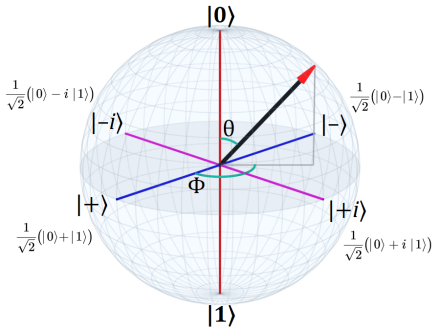
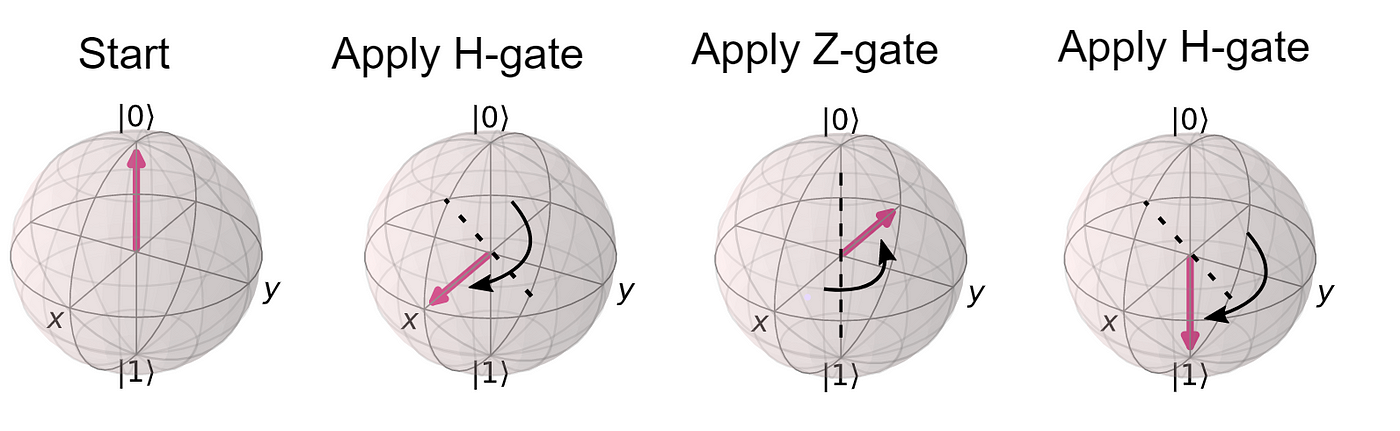

Linearna kombinacija kvantnih stanja (superpozicija):

|ψ〉 = α |0〉 + β |1〉

|ψ⟩ = cos(θ/2) |0⟩ + e^(iφ) sin(θ/2) |1⟩

In [8]:
from cirq_web import BlochSphere

print("Blohova sfera stanje  |0〉:\n")
sphere = BlochSphere(state_vector=[1, 0])
sphere

Blohova sfera stanje  |0〉:



In [9]:
print("Blohova sfera stanje  |1〉:\n")
sphere2 = BlochSphere(state_vector=[0, 1])
sphere2

Blohova sfera stanje  |1〉:



In [10]:
from cirq_web import BlochSphere
import numpy as np

print("Belovo stanje:")
sphere = BlochSphere(state_vector=[1, 1]/np.sqrt(2))
display(sphere)

Belovo stanje:


Korelacija merenja u Belovom stanju je jaca nego sto bi ikada moglo postojati izmedju klasicnih sistema

### **Kvantna teleportacija**

---



Teleportacija kao koncept podrazumeva razmenu kjubita, odnosno informacija o stanju kjubita, bez fizicke razmene kjubita izmedju dve strane u komunikaciji. Protokol se zasniva na kvantnoj upetljanosti jednog para kjubita koji se koriste kao veza izmedju sagovornika. Cilj je da se prenese stanje |ψ〉 = α |0〉 + β |1〉bez prenosa samog kjubita.

Alis i Bob su miljama udaljeni jedno od drugog ali zajedno generisu upetljani par kjubita (njihove osobine su u korelaciji bez obzira na udaljenost)

|βoo〉 = (|00〉 + |11〉)/√2

Alis dobija stanje  |ψ〉, ona ne zna sta je to stanje ali zeli da ga posalje Bobu.  

Kako ce Alis to da uradi?

In [ ]:
def make_quantum_teleportation_circuit(gate):
    """
    Pravimo tri kjubita koja ce biti ukljucena u teleportaciju
    """
    circuit = cirq.Circuit()

    msg = cirq.NamedQubit("Message")
    alice = cirq.NamedQubit("Alice")
    bob = cirq.NamedQubit("Bob")

    # Ulazna kapija priprema poruku za slanje
    circuit.append(gate(msg))

    # Pravimo Belovo stanje koje se deli izmedju Alis i Boba
    circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])


    return circuit

In [ ]:
"""Vizualizacija kvantnog kola za teleportaciju"""
# Kapija koja postavlja kjubit u stanje za slanje
gate = cirq.X ** 0.25

circuit = make_quantum_teleportation_circuit(gate)
print("Kvantno kolo za teleportaciju:\n")
print(circuit)

Kvantno kolo za teleportaciju:

Alice: ─────H────────@───
                     │
Bob: ────────────────X───

Message: ───X^0.25───────


|ψ0〉 = |ψ〉|βoo〉= 1/√2 [ α|0〉(|00〉 + |11〉) + β|1〉(|00〉 + |11〉) ]



In [ ]:
def make_quantum_teleportation_circuit(gate):
    """
    Pravimo tri kjubita koja ce biti ukljucena u teleportaciju
    """
    circuit = cirq.Circuit()

    msg = cirq.NamedQubit("Message")
    alice = cirq.NamedQubit("Alice")
    bob = cirq.NamedQubit("Bob")

    # Ulazna kapija priprema poruku za slanje
    circuit.append(gate(msg))

    # Pravimo belovo stanje koje se deli izmedju Alis i Boba
    circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])

    # Alis salje njene kjubite kroz CNOT kapiju
    circuit.append([cirq.CNOT(msg, alice)])

    return circuit

In [ ]:
"""Vizualizacija kvantnog kola za teleportaciju"""
# Kapija koja postavlja kjubit u stanje za slanje
gate = cirq.X ** 0.25

circuit = make_quantum_teleportation_circuit(gate)
print("Kvantno kolo za teleportaciju:\n")
print(circuit)

Kvantno kolo za teleportaciju:

Alice: ─────H────────@───X───
                     │   │
Bob: ────────────────X───┼───
                         │
Message: ───X^0.25───────@───


|ψ1〉 = 1/√2
[
α|0〉(|00〉 + |11〉) + β|1〉(|10〉 + |01〉)
]


In [ ]:
def make_quantum_teleportation_circuit(gate):
    """
    Pravimo tri kjubita koja ce biti ukljucena u teleportaciju
    """
    circuit = cirq.Circuit()

    msg = cirq.NamedQubit("Message")
    alice = cirq.NamedQubit("Alice")
    bob = cirq.NamedQubit("Bob")

    # Ulazna kapija priprema poruku za slanje
    circuit.append(gate(msg))

    # Pravimo belovo stanje koje se deli izmedju Alis i Boba
    circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])

    # Alis salje njene kjubite kroz CNOT kapiju,
    # nakon toga prvi kjubit kroz Hadamard kapiju
    circuit.append([cirq.CNOT(msg, alice), cirq.H(msg)])

    return circuit

In [ ]:
"""Vizualizacija kvantnog kola za teleportaciju"""
# Kapija koja postavlja kjubit u stanje za slanje
gate = cirq.X ** 0.25

circuit = make_quantum_teleportation_circuit(gate)
print("Kvantno kolo za teleportaciju:\n")
print(circuit)

Kvantno kolo za teleportaciju:

Alice: ─────H────────@───X───────
                     │   │
Bob: ────────────────X───┼───────
                         │
Message: ───X^0.25───────@───H───


|ψ2〉 = 1/2
[
α(|0〉 + |1〉)(|00〉 + |11〉) + β(|0〉 − |1〉)(|10〉 + |01〉)
]


|ψ2〉 = 1/2
[
|00〉 (α|0〉 + β|1〉) + |01〉 (α|1〉 + β|0〉) + |10〉 (α|0〉 − β|1〉) + |11〉 (α|1〉 − β|0〉)]


In [ ]:
def make_quantum_teleportation_circuit(gate):
    """
    Pravimo tri kjubita koja ce biti ukljucena u teleportaciju
    """
    circuit = cirq.Circuit()

    msg = cirq.NamedQubit("Message")
    alice = cirq.NamedQubit("Alice")
    bob = cirq.NamedQubit("Bob")

    # Ulazna kapija priprema poruku za slanje
    circuit.append(gate(msg))

    # Pravimo belovo stanje koje se deli izmedju Alis i Boba
    circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])

    # Alis salje njene kjubite kroz CNOT kapiju,
    # nakon toga prvi kjubit kroz Hadamard kapiju, zatim ih meri
    circuit.append([cirq.CNOT(msg, alice), cirq.H(msg), cirq.measure(msg, alice)])

    return circuit

In [ ]:
"""Vizualizacija kvantnog kola za teleportaciju"""
# Kapija koja postavlja kjubit u stanje za slanje
gate = cirq.X ** 0.25

circuit = make_quantum_teleportation_circuit(gate)
print("Kvantno kolo za teleportaciju:\n")
print(circuit)

Kvantno kolo za teleportaciju:

Alice: ─────H────────@───X───────M───
                     │   │       │
Bob: ────────────────X───┼───────┼───
                         │       │
Message: ───X^0.25───────@───H───M───


00  −→ |ψ3 (00)〉 ≡
[
α|0〉 + β|1〉]                

01  −→ |ψ3 (01)〉 ≡
[
α|1〉 + β|0〉]

10  −→ |ψ3 (10)〉 ≡
[
α|0〉 − β|1〉]

11  −→ |ψ3 (11)〉 ≡
[
α|1〉 − β|0〉
]


In [6]:
def make_quantum_teleportation_circuit(gate):
    """
    Pravimo tri kjubita koja ce biti ukljucena u teleportaciju
    """
    circuit = cirq.Circuit()

    msg = cirq.NamedQubit("Message")
    alice = cirq.NamedQubit("Alice")
    bob = cirq.NamedQubit("Bob")

    # Ulazna kapija priprema poruku za slanje
    circuit.append(gate(msg))

    # Pravimo belovo stanje koje se deli izmedju Alis i Boba
    circuit.append([cirq.H(alice), cirq.CNOT(alice, bob)])

    # Alis salje njene kjubite kroz CNOT kapiju,
    # nakon toga prvi kjubit kroz Hadamard kapiju, zatim ih meri
    circuit.append([cirq.CNOT(msg, alice), cirq.H(msg), cirq.measure(msg, alice)])

    # U zavisnosti od Alisinog rezultata merenja Bobov kjubit ce biti u jednom
    # od cetiri moguca stanja. Bob treba da oporavi svoj kjubit primenom
    # odgovarajuce kvantne kapije
    circuit.append([cirq.CNOT(alice, bob), cirq.CZ(msg, bob)])

    return circuit

In [7]:
"""Vizualizacija kvantnog kola za teleportaciju"""
# Kapija koja postavlja kjubit u stanje za slanje
gate = cirq.X ** 0.25

circuit = make_quantum_teleportation_circuit(gate)
print("Kvantno kolo za teleportaciju:\n")
print(circuit)

Kvantno kolo za teleportaciju:

Alice: ─────H────────@───X───────M───@───────
                     │   │       │   │
Bob: ────────────────X───┼───────┼───X───@───
                         │       │       │
Message: ───X^0.25───────@───H───M───────@───


In [10]:
"""Prikaz Blohovog vektora kjubita msg."""
message = cirq.Circuit(gate.on(cirq.NamedQubit("Message"))).final_state_vector()
message_bloch_vector = cirq.bloch_vector_from_state_vector(message, index=0)
print("Bloch vector of message qubit:")
print(np.round(message_bloch_vector, 3))

Bloch vector of message qubit:
[ 0.    -0.707  0.707]


### **Stanja kjubita na Blohovoj sferi nakon teleportacije:**

Da bismo teleportovali kjubit sa jedne lokacije na drugu moramo da unistimo originar.

In [4]:
from cirq_web import BlochSphere

print("Blohova sfera stanje Alisinog kjubita nakon teleportacije:\n")
sphere = BlochSphere(state_vector=[1, 0])
sphere

Blohova sfera stanje Alisinog kjubita nakon teleportacije:



In [5]:
from cirq_web import BlochSphere

print("Blohova sfera stanje kjubita u kom je bila poruka nakon teleportacije:\n")
sphere = BlochSphere(state_vector=[0, 1])
sphere

Blohova sfera stanje kjubita u kom je bila poruka nakon teleportacije:



In [6]:
from cirq_web import BlochSphere
import numpy as np

print("Bobov kjubit nakon teleportacije(stanje koje smo zeleli da posaljemo):\n")
sphere = BlochSphere(state_vector=[-1, 1]/np.sqrt(2))
display(sphere)

Bobov kjubit nakon teleportacije(stanje koje smo zeleli da posaljemo):



**Literatura**:

*   'Quantum Computation and Quantum Information'  Michael A. Nielsen & Isaac L. Chuang

*    Nikola Spasojevic, Kvantno programiranje, master teza MATF


*   Tina Radkohl,
 Quantum Teleportation and
 Superdense Coding,
 A case study with IBM's quantum computer,
 Bachelor Thesis
*   Prezentacije sa predavanja: [Blohova sfera](https://drive.google.com/file/d/1gdzcFlzyR5aBXaK9LAoY51dtO01dSg2d/view?usp=drive_link), [Teleportacija kjubita
](https://drive.google.com/file/d/1maYotOb4i3Q3OdI4F3KXXNvy-jOwsWF3/view)
